# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 5

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **20 апреля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

from statsmodels.sandbox.stats.multicomp import multipletests
from tqdm.notebook import tqdm

%matplotlib inline


# Теоретическая часть

## p-value

### Задача 1. 
 Для всех пунктов задач 5 и 6 прошлого домашнего задания выпишите формулу для p-value  $p(t) = <...>$  в виде кода на `scipy`, где $t$ - реализация статистики вашего критерия, т.е. $t = T(x), x$ &mdash; реализация выборки, $T(X)$ &mdash; статистика. 

Для задачи 6 также посчитайте численные значения для обоих случаев p-value для данного в задаче существа. Какие гипотезы отклоняются? 

Вычисления можно выполнить в Питоне по приведенным вами формулам. 

## Множественная проверка гипотез


### Задача 2.
 Пусть $X_1, ...,  X_n$ --- выборка из неизвестного распределения $\mathsf{P}$. Для проверки гипотез $\mathsf{H}_0\ vs.\ \mathsf{H}_1$ было решено использовать три различных критерия. Соответствующие p-value равны 0.00001, 0.7361, 0.0482. Какое должно быть принято решение об отвержении гипотезы $\mathsf{H}_0$ на уровне значимости 0.05? *Подсказка: используйте любой подходящий метод МПГ, далее делайте вывод об отвержении/не отвержении, поясните свой вывод.*

## Хи-квадрат

### Задача 3.
 Компания по производству кормов для собак провела опрос $5000$ владельцев собак о том, какой корм предпочитают их питомцы. По результатам опроса оказалось, что $1010$ собак предпочитают корм со вкусом лосося, $2200$ &mdash; со вкусом курицы, $950$ &mdash; со вкусом говядины, а все остальные собаки предпочитают корм с овощами. Компания сделала предположение, что вероятности предпочтения кормов равны соответственно $\theta, 2\theta, \theta, 1-4\theta$,
	где $\theta\in(0,1/4)$. Верно ли данное предположение? Выпишите теоретические формулы и код для подсчета значения статистики и p-value  в `scipy`. Вычисление статистики и p-value можно выполнить в Питоне.


# Решение задач

### Задача 1
В задаче № 5

$p_a(t) = \text{sps.norm(loc}= n \theta, \text{scale=$\sqrt{n}$).cdf(t)}$

$p_b(t) = \text{sps.norm(loc}=n \theta, \text{scale=$\sqrt{n}$).sf(t)}$

В прошлом дз было показано, что $T(X) = \sum_{i=1}^{n} X_i $

В задаче № 6

$p_a(t) = \text{sps.gamma(6/7, 2).sf(t)}$

$p_b(t) = \text{sps.gamma(5/44, 3).cdf(t)}$

В прошлом дз было показано, что в этой задаче T(X) = X, т.к. функция правдоподобия монотонно возрастает

In [3]:
x = 6.66
p1 = sps.gamma(6/7, 2).cdf(x)

print("p-value для $\Gamma(6/7, 2)$ " + str(p1))
print("p-value > 0.05 => не отвергаем гипотезу")

p2 = sps.gamma(5/44, 3).sf(x)

print("\n\np-value для $\Gamma(5/44, 3)$ " + str(p2))
print("p-value < 0.05 => отвергаем гипотезу")

p-value для $\Gamma(6/7, 2)$ 0.9933025145904693
p-value > 0.05 => не отвергаем гипотезу


p-value для $\Gamma(5/44, 3)$ 0.000814152459961162
p-value < 0.05 => отвергаем гипотезу


### Задача 2

In [446]:
p_values = [0.00001, 0.7361, 0.0482]
reject, pvals_corrected = multipletests(p_values, alpha=0.05, method='holm', is_sorted=False)[:2]
print('reject')
print(reject)
print('p-value')
print(pvals_corrected)

reject
[ True False False]
p-value
[3.000e-05 7.361e-01 9.640e-02]


При множественной проверке гипотез методом Холма(он самый мощный, когда неизвестно ничего о выборке) оказалось, что только первое скорректированное p-value < 0.05. Следовательно -- только оно отвергает гипотезу $\mathsf{H}_0$.

### Задача 3

Разделим всех покупателей по корзинам и посмотрим найдём ОМП $\theta$ из обобщенного критерия хи-квадрат.


$$\theta = argmax(\sum_{j=1}^{4} \mu_j p^0_j(\theta)))$$

где $\mu_1 = 1010, ~~ \mu_2 = 2200,~~ \mu_3 = 950, ~~ \mu_4=840$, $p^0_1 = \theta, ~~ p^0_2 = 2\theta,~~ p^0_3 = \theta, ~~ p^0_4 = 1- 4\theta$.

$$l(\theta) = \mu_1 \ln \theta + \mu_2 \ln (2\theta) + \mu_3 \ln \theta + \mu_4 \ln(1- 4\theta)$$

$$l'(\theta) = \dfrac{\mu_1  + \mu_2   + \mu_3}{\theta} - \dfrac{4 \mu_4}{1- 4\theta} =0 $$

Откуда следует, что $\theta = \dfrac{\mu_1  + \mu_2   + \mu_3}{4 (\mu_1  + \mu_2   + \mu_3 + \mu_4)} =0.208$

In [523]:
theta = 0.208
n=5000
f_exp = [n* theta, n* 2*theta, n*theta,n*(1-4*theta)]
sps.chisquare([1010, 2200, 950, 840], f_exp = f_exp, ddof=1)

Power_divergenceResult(statistic=15.576923076923077, pvalue=0.00041449007074133005)

pvalue < 0.05 => отвергаем гипотезу.

# Практическая часть

## Множественная проверка гипотез


### Задача 4.
Проведены эксперименты для оценки эффективности нескольких препаратов для снижения послеоперационной тошноты. Результаты экспериментов приведены в таблице ниже. При проведении эксперимента пациенты делились на группы случайным образом.

    
                            Количество пациентов  Количество случаев возникновения тошноты

		Плацебо                80                    45 

		Хлорпромазин           75                    26 
    
		Дименгидринат          85                    52 
    
		Пентобарбитал (100 мг) 67                    35 
    
		Пентобарбитал (150 мг) 85                    37 
    

 Проведите сравнение каждого препарата по эффективности по отношению к плацебо c использованием критерия Вальда (см. лекцию 5 и последующие). Какие методы МПГ, контролирующие FWER и FDR, можно использовать в данной задаче? Какие ответы можно получить для этих методов? В каждом случае приведите значения статистики критерия Вальда, p-value и скорректированные p-value. Оформите решение структурированно. 

In [462]:
data = pd.DataFrame([["Плацебо", 80, 45],
    ["Хлорпромазин", 75, 26],
    ["Дименгидринат", 85, 52],
    ["Пентобарбитал (100 мг)", 67, 35],
    ["Пентобарбитал (150 мг)", 85, 37]])

data.columns = ["Название", "Количество пациентов", "Количество случаев возникновения тошноты"]

In [463]:
data

,Название,Количество пациентов,Количество случаев возникновения тошноты
0,Плацебо,80,45
1,Хлорпромазин,75,26
2,Дименгидринат,85,52
3,Пентобарбитал (100 мг),67,35
4,Пентобарбитал (150 мг),85,37


Дана бернуллиевская выборка результатов испытаний $X_1, ..., X_n \sim Bern(\theta)$

$\mathsf{H}_0\colon\ \theta = 1/2\ \ vs.\ \ \mathsf{H}_1\colon\ \theta > 1/2$

$W(X1, X2)=\frac{\widehat{p1}-\widehat{p2}}{\widehat{\sigma}}$, что стремится по распределению к $N(0,1)$

$\widehat{\sigma} = \sqrt{\frac{\widehat{p1}(1-\widehat{p1})}{n}+\frac{\widehat{p2}(1-\widehat{p2})}{m}}$

Критерий Вальда: 

$S = \{{W(x, y) > z_{1-\alpha}}\}$


In [483]:
n = data["Количество пациентов"].to_numpy()
m = data["Количество случаев возникновения тошноты"].to_numpy()
theta = m/n
sigma = np.sqrt(theta* (1-theta)/n + theta[0]* (1-theta[0])/n[0])
# T -- статистика критерия Вальда
T = (theta[0] - theta)/sigma


data['Wald'] = T
pval = sps.norm.sf(T)
data['p-value'] = pval
methods = ['bonferroni', 'sidak', 'holm-sidak', 'holm', 'fdr_bh', 'fdr_by']
for method in methods:
    data['Скорректированные p-value. Метод ' + method] = multipletests(pval, method = method)[1]
data

,Название,Количество пациентов,Количество случаев возникновения тошноты,Wald,p-value,Скорректированные p-value. Метод bonferroni,Скорректированные p-value. Метод sidak,Скорректированные p-value. Метод holm-sidak,Скорректированные p-value. Метод holm,Скорректированные p-value. Метод fdr_bh,Скорректированные p-value. Метод fdr_by
0,Плацебо,80,45,0.000000,0.500000,1.000000,0.968750,0.750000,1.000000,0.625000,1.000000
1,Хлорпромазин,75,26,2.764364,0.002852,0.014258,0.014177,0.014177,0.014258,0.014258,0.032557
2,Дименгидринат,85,52,-0.642987,0.739884,1.000000,0.998809,0.750000,1.000000,0.739884,1.000000
3,Пентобарбитал (100 мг),67,35,0.486428,0.313332,1.000000,0.847337,0.676227,0.939996,0.522220,1.000000
4,Пентобарбитал (150 мг),85,37,1.646605,0.049820,0.249098,0.225484,0.184875,0.199278,0.124549,0.284387


**Вывод:**
Все методы говорят одно и тоже: что основную гипотезу на припарате Хлорпромазин нужно отвергать.
Следовательно достаточно рассматривать один метод контроля.

## Критерии согласия

При решении стоит использовать **готовые реализации критериев из** `scipy.stats`. При возникновении затруднений посмотрите в ноутбук с лекции 9.
________________
### Задача 5.

С помощью критерия хи-квадрат вам нужно проверить, правильно ли `scipy.stats` генерирует случайные величины. 

**1.** Реализуйте критерий хи-квадрат для проверки корректности генерации выборки $U\{1, ..., 10\}$ (дискретное равномерное распределение). Тем самым проверьте, что `sps.randint` действительно генерирует выборку из равномерного распределения. Подберите размер выборки такой, чтобы выполнялись условия применимости критерия хи-квадрат. Поясните свой выбор.





In [256]:
sample_size = 100

sample = sps.randint(low=0, high=10).rvs(size=sample_size)

f_obs = []
k = int(np.floor(np.log2(sample_size)))
for i in range(0,k):
    f_obs.append((sample==i).sum())
    
f_obs = np.array(f_obs)
f_obs

array([ 8,  8, 12, 10, 11,  6])

In [257]:
sps.chisquare(f_obs)

Power_divergenceResult(statistic=2.709090909090909, pvalue=0.7447276759432265)

**2.** Проверьте, действительно ли код `sps.poisson(mu=5).rvs(size=1000)` генерирует выборку размера 1000 из пуассоновского распределения с параметром 5. 

**Указания**
1. Не забудьте учесть условия применимости критерия хи-квадрат;
2. Для вычисления дискретной плотности (вероятности) воспользуйтесь `sps.poisson(mu=5).pmf`;
3. Для подсчета количества элементов в разбиении на множества воспользуйтесь `np.unique(sample, return_counts=True)`;
4. Не нужно писать сколь-либо универсальный код, который одним нажатием кнопки проверяет гипотезу с учетом всех условий применимости критерия. Расписывайте код поэтапно, на каждый логический этап свой код в отдельной ячейке для *конкретной* реализации выборки. Так вам проще реализовать, а нам проще проверять.




In [525]:
n = 1000
sample_pois = sps.poisson(mu=5).rvs(size=n)
k = int(np.ceil(np.log2(n)))

bins = np.unique(sample_pois, return_counts=True)[1][:k]
bins

array([  5,  33,  80, 146, 166, 160, 147, 106,  74,  46])

In [527]:
theor_bins = n* sps.poisson(mu=5).pmf(range(k))
theor_bins

array([  6.737947  ,  33.689735  ,  84.22433749, 140.37389581,
       175.46736977, 175.46736977, 146.22280814, 104.44486296,
        65.27803935,  36.26557742])

In [528]:
sps.chisquare(bins, f_exp = theor_bins, ddof=1)

Power_divergenceResult(statistic=6.57958511692241, pvalue=0.5825941768045677)

**Вывод:**

Критерий Хи квадрат не отвергает гипотезы, что scipy.stats генерирует правильные случайные величины. Это не говорит о том, что scipy.stats работает корректно, возможно у нас недостаточно данных.

__________________
### Задача 6.

На лекциях и семинарах были разобраны следующие критерии проверки нормальности:
* Колмогорова;
* Жарка-Бера;
* Шапиро-Уилка.

При этом критерий Колмогорова универсален, но существует его модификация для проверки нормальности — <a href="https://ru.wikipedia.org/wiki/Критерий_Лиллиефорса"> Критерий Лиллиефорса.</a> При решении задачи можете воспользоваться им, например, взяв реализацию из библиотеки `statsmodels`: <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.lilliefors.html">`statsmodels.stats.diagnostic.lilliefors`</a>, или же применять для конкретной $F_0$ критерий Колмогорова, пример использования которого можно найти в ноутбуке с лекции.

**1.** Данные критерии являются асимптотическими, и их реальное значение уровня значимости может отличаться от желаемого числа $\alpha=0.05$. На лекции 7 разобран метод оценки реального уровня значимости критерия. Посчитайте реальный уровень значимости этих критериев для размеров выборки от 5 до 100. В данном случае можно привести теоретические соображения, согласно которым стоит использовать количество генерируемых выборок `sample_count `$\ge 10^6$, но для ускорения работы при выполнении задания можете использовать `sample_count = 10**4`.



*Подсказка:*

In [ ]:
max_sample_size = ...
sample_count = ...
is_reject_<критерий> = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(max_sample_size)):
    for j in range(sample_count):
        sample = ...
        is_reject_<критерий>[i, j] = ...

Ваша реализация:

In [308]:
from statsmodels.stats.diagnostic import lilliefors
alpha = 0.05

In [149]:
max_sample_size = 100
sample_count = 10**4
is_reject_lilliefors = np.zeros((max_sample_size, sample_count))
is_reject_jarque_bera = np.zeros((max_sample_size, sample_count))
is_reject_shapiro = np.zeros((max_sample_size, sample_count))


# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = sps.norm.rvs(size = i)
        is_reject_shapiro[i, j] = sps.shapiro(sample)[1]
        is_reject_jarque_bera[i, j] = sps.jarque_bera(sample)[1]
        is_reject_lilliefors[i, j] = lilliefors(sample, dist='norm')[1]

  0%|          | 0/95 [00:00<?, ?it/s]

Нарисуйте на одном графике зависимость реального уровня значимости от размера выборки для каждого критерия. Пунктиром отметьте уровень 0.05. Не забудьте добавить легенду и подписать оси.

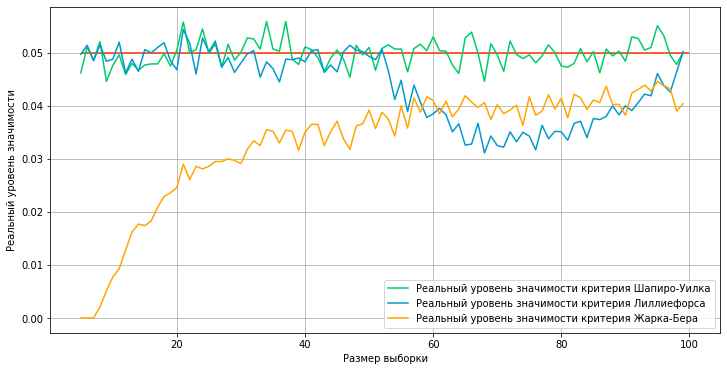

In [150]:
plt.figure(figsize=(12, 6))

real_alpha_shapiro = (is_reject_shapiro<alpha).sum(axis=1)/sample_count 
real_alpha_lilliefors = (is_reject_lilliefors<alpha).sum(axis=1)/sample_count
real_alpha_jarque_bera = (is_reject_jarque_bera<alpha).sum(axis=1)/sample_count

plt.plot(np.arange(5, 100), real_alpha_shapiro[5:], color = green,  label = "Реальный уровень значимости критерия Шапиро-Уилка")
plt.plot(np.arange(5, 100), real_alpha_lilliefors[5:], color = blue,  label = "Реальный уровень значимости критерия Лиллиефорса")
plt.plot(np.arange(5, 100), real_alpha_jarque_bera[5:], color = 'orange', label = "Реальный уровень значимости критерия Жарка-Бера")
plt.hlines(0.05, 5, 100, color=red)

plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень значимости')

plt.legend()
plt.grid()
plt.show()

Какой можно сделать вывод?

Реальный уровень значимости у Лиллиефорса и Шапиро-Уилка для малых данных меньше 0.05, однако ассимптотический они всё же стремятся к 0.05 как и заявлено. 

**2.** Аналогичным образом можно вычислять мощность критерия. Вычислите мощности критериев для размеров выборки от 5 до 100, если альтернативная гипотеза заключается в том, что выборка имеет стандартное распределение Коши. Иначе говоря, для критерия $S$ надо приближенно посчитать $\beta_S(\mathsf{P})$, где $\mathsf{P}$ — стандартное распределение Коши.

Нарисуйте на одном графике зависимость мощности критерия от размера выборки для каждого критерия. Не забудьте добавить легенду и подписать оси.


In [190]:
max_sample_size = 100
sample_count = 10**4
is_reject_lilliefors_c = np.zeros((max_sample_size, sample_count))
is_reject_jarque_bera_c = np.zeros((max_sample_size, sample_count))
is_reject_shapiro_c = np.zeros((max_sample_size, sample_count))
is_reject_kolm = np.zeros((max_sample_size, sample_count))

# tqdm показывает, сколько еще времени будет выполняться цикл и сколько прошло
for i in tqdm(range(5, max_sample_size)):
    for j in range(sample_count):
        sample = sps.cauchy.rvs(size = i)
        is_reject_shapiro_c[i, j] = sps.shapiro(sample)[1]
        is_reject_jarque_bera_c[i, j] = sps.jarque_bera(sample)[1]
        is_reject_lilliefors_c[i, j] = lilliefors(sample, dist='norm')[1]
        is_reject_kolm[i, j] = sps.kstest(sample, cdf=sps.norm.cdf)[1]

  0%|          | 0/95 [00:00<?, ?it/s]

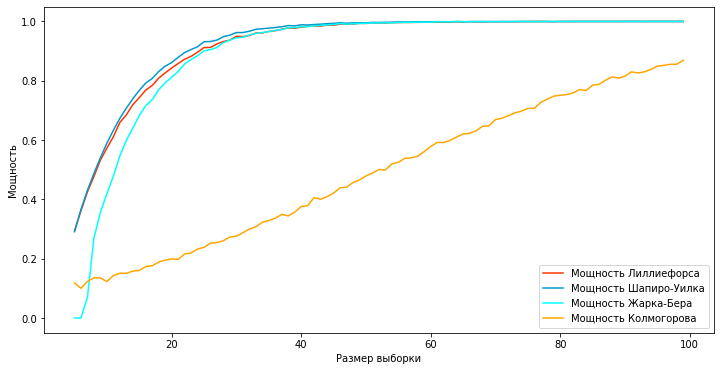

In [509]:
plt.figure(figsize=(12, 6))

power_of_lilliefors = (is_reject_lilliefors_c<alpha).sum(axis=1)/sample_count 
power_of_shapiro = (is_reject_shapiro_c<alpha).sum(axis=1)/sample_count
power_of_jarque_bera = (is_reject_jarque_bera_c<alpha).sum(axis=1)/sample_count
power_of_kolm = (is_reject_kolm < alpha).sum(axis=1)/sample_count
plt.plot(np.arange(5, 100), power_of_lilliefors[5:], color = red,  label = "Мощность Лиллиефорса")
plt.plot(np.arange(5, 100), power_of_shapiro[5:], color = blue,  label = "Мощность Шапиро-Уилка")
plt.plot(np.arange(5, 100), power_of_jarque_bera[5:], color = "cyan",  label = "Мощность Жарка-Бера")
plt.plot(np.arange(5, 100), power_of_kolm[5:], color = 'orange',  label = "Мощность Колмогорова")

plt.xlabel('Размер выборки')
plt.ylabel('Мощность')

plt.legend()
plt.grid()

plt.legend()
plt.grid()
plt.show()

Сделайте вывод. Какой критерий является наиболее мощным при данной альтернативе?

При малом размере выборки -- Шапиро-Уилка, а при больших размерах выборки они все примерно одинаковы(кроме Колмогорова, он является достаточно общим поэтому и имеет малую мощность). 

**3*.** Распределение [Стьюдента](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A1%D1%82%D1%8C%D1%8E%D0%B4%D0%B5%D0%BD%D1%82%D0%B0) является в некотором смысле обобщением нормального распределения (при бесконечном количестве степеней свободы) и распределения Коши (при одной степени свободы). 

Постройте на одном графике графики плотности распределения Коши, распределения Стьюдента с 1, 5, 10 степенями свободы и стандартного нормального распределения. Как меняется форма графика распределения Стьюдента с изменением количества степеней свободы? 

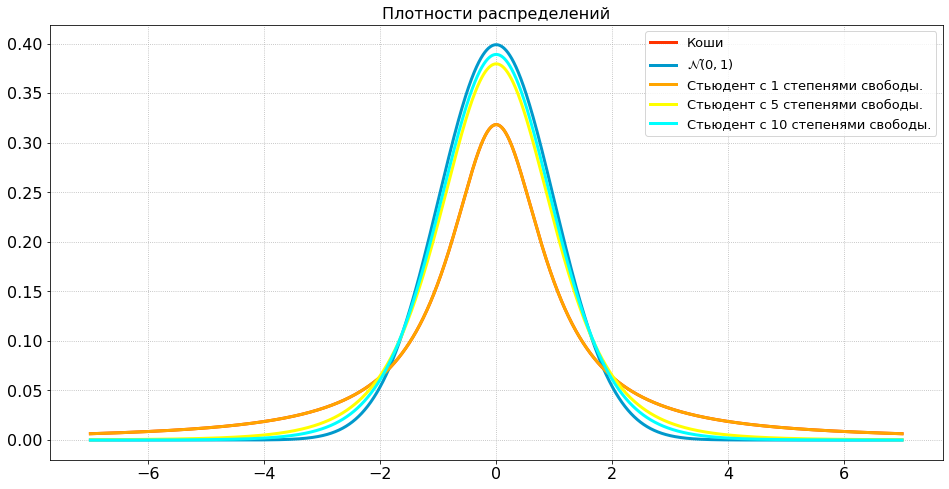

In [491]:
grid = np.linspace(-7,7, 10**4)

plt.figure(figsize=(16,8))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue,
        label='$\mathcal{N}(0, 1)$', lw=3)

for i,color in zip([1,5,10],['orange','yellow' ,'cyan']):
    tmp_str = 'Стьюдент с ' + str(i)+ ' степенями свободы.'
    plt.plot(grid, sps.t(i).pdf(grid), color=color,
        label=tmp_str, lw=3)


plt.xticks(fontsize=16), plt.yticks(fontsize=16)
plt.title('Плотности распределений', fontsize=16)
plt.legend(fontsize=13)
plt.grid(ls=':')
plt.show()

С увеличением числа степеней своводы распределение Стьюдента всё ближе и ближе к стандартному нормальному.

Посчитайте приближенно мощности критериев для выборки размера 50 если альтернатива заключается в том, что выборка имеет распределение Стьюдента. Поскольку мощность критерия является функцией от распределения из альтернативной гипотезы, вам нужно реализовать функцию (например, принимающую количество степенй свободы). Посчитайте её значения для целых значений степени свободы от 1 до 10.

Нарисуйте на одном графике зависимость мощности критерия от **количества степеней свободы** для каждого из трех критериев. Не забудьте добавить легенду и подписать оси.

In [534]:
def t_power(deg_of_freed, alpha):
    is_reject_shapiro_t = []
    is_reject_jarque_bera_t = []
    for j in range(sample_count):
        sample = sps.t(deg_of_freed).rvs(size=50)
        is_reject_shapiro_t.append(sps.shapiro(sample)[1])
        is_reject_jarque_bera_t.append(sps.jarque_bera(sample)[1])
        
    is_reject_shapiro_t = np.array(is_reject_shapiro_t)
    tmp_shap = (is_reject_shapiro_t < alpha).sum()/sample_count
    
    is_reject_jarque_bera_t = np.array(is_reject_jarque_bera_t)
    tmp_jark = (is_reject_jarque_bera_t < alpha).sum()/sample_count
    
    return [tmp_shap, tmp_jark]


power_shapiro_t = []
power_jarque_bera_t = []
for i in tqdm(range(1,11)):
    res = t_power(i, 0.05)
    power_shapiro_t.append(res[0])
    power_jarque_bera_t.append(res[1])

  0%|          | 0/10 [00:00<?, ?it/s]

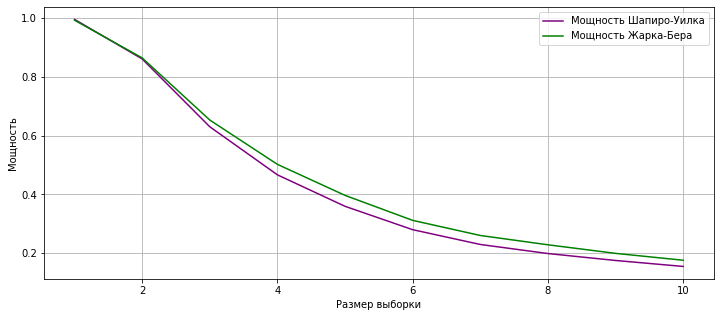

In [538]:
plt.figure(figsize=(12,5))

plt.plot(np.arange(1, 11), power_shapiro_t, color = 'purple',  label = "Мощность Шапиро-Уилка")
plt.plot(np.arange(1, 11), power_jarque_bera_t, color = 'green',  label = "Мощность Жарка-Бера")

plt.xlabel('Размер выборки')
plt.ylabel('Мощность')

plt.legend()
plt.grid()
plt.show()

Сделайте вывод относительно мощности критерия при разных распределениях из альтернативы. Объясните наблюдаемую зависимость мощности от степени свободы.

Мощность убывает, т.к. с увеличением степеней свободы распределение всё больше и больше похоже на нормальное, что является нашей основной гипотезой.

__________________
### Задача 7.


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a>. Для этого зайдите в папку "DataFolder" и скачайте файл `wine.data`. Читать файл можно с помощью функции `read_csv`.  В этом датасете представлены различные характеристики вин. Возьмите все колонки, кроме `Class` (класс вина). В дальнейшем, как и раньше, будем называть колонки признаками.

In [270]:
df = pd.read_csv('wine.data')
df = df.drop(columns=['Class'])
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Для каждого из признаков нарисуйте Q-Q plot. Для наглядности и экономии места рисуйте графики в несколько строк и столбцов, используя `plt.subplot`.

<Figure size 864x432 with 0 Axes>

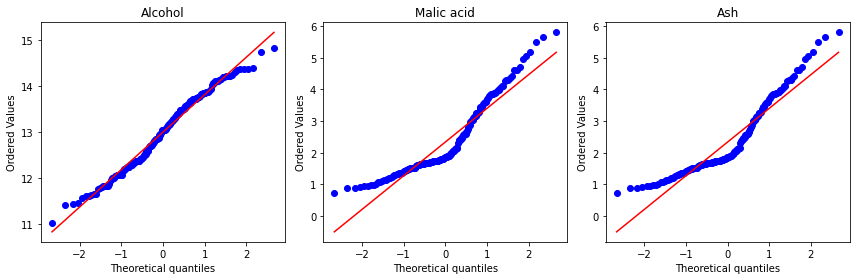

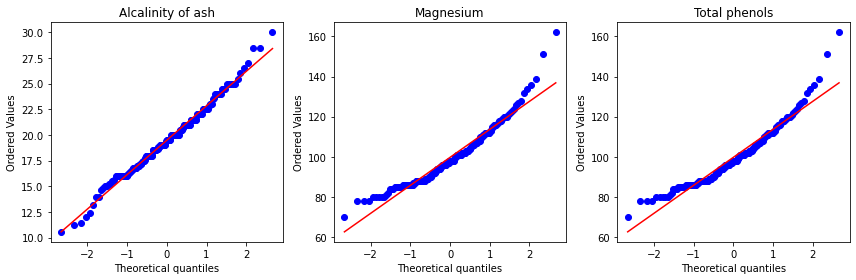

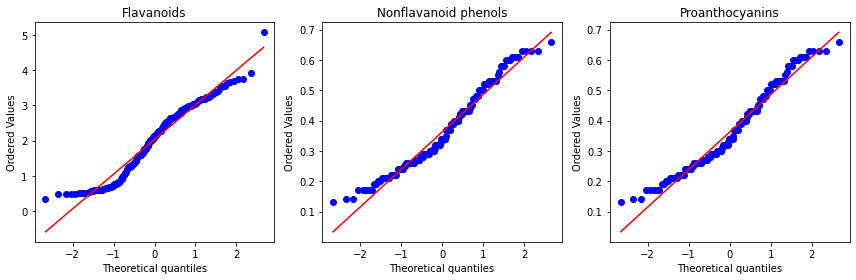

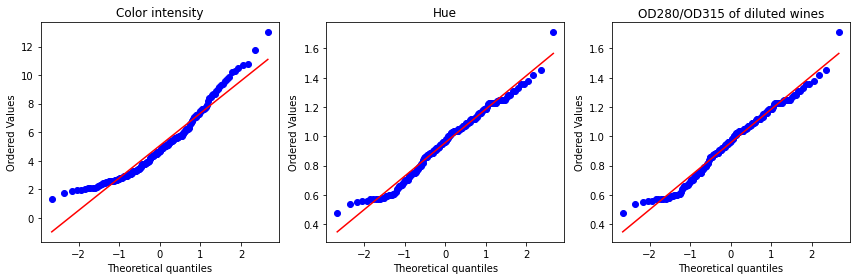

<function matplotlib.pyplot.show(close=None, block=None)>

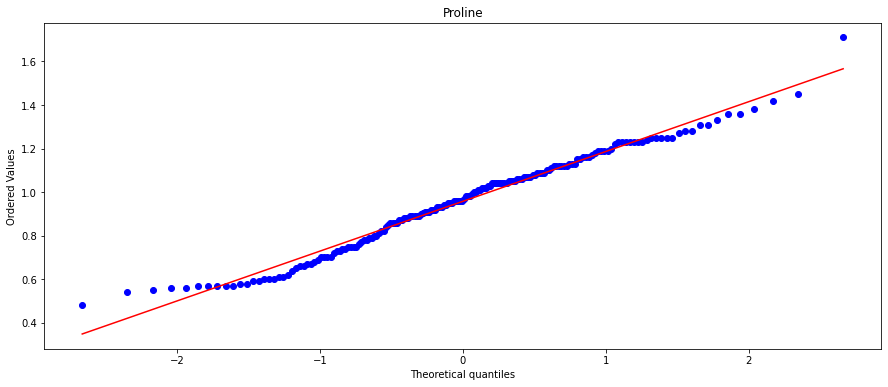

In [421]:
plt.figure(figsize=(12, 6))


for i in range(0, len(df.columns)-1,3):
    sample = df[df.columns[i]].to_numpy()

    plt.figure(figsize=(12, 4))

    ax = plt.subplot(1, 3, 1)
    sps.probplot(sample, plot=ax)
    ax.set_title(df.columns[i])
    
    
    sample = df[df.columns[i+1]].to_numpy()

    ax = plt.subplot(1, 3, 2)
    
    sps.probplot(sample, plot=ax)
    ax.set_title(df.columns[i+1])
    
    
    ax = plt.subplot(1, 3, 3)
    
    sps.probplot(sample, plot=ax)
    ax.set_title(df.columns[i+2])
    plt.tight_layout()
    plt.show()
    
plt.figure(figsize=(15, 6))
sps.probplot(sample, plot=plt)
plt.title(df.columns[len(df.columns)-1])
plt.show


Для каких признаков можно говорить об их нормальности и почему?

**Ответ:** Если признаки имеют нормальное распределение, то они будут вытянуты почти вдоль всей красной линии с различием на хвостах. Отсюда можно сделать вывод, что Alcohol, Magnesium, Total phenols, Alcalinity of Ash, Proanthocyanins, Hue, Nonflavanoid phenols, OD280/OD315 of diluted wines, Proline могут быть из нормального распределения.

Проверьте нормальность каждого признака статистическими критериями. Прежде чем выполнить следующую часть задачи, ответьте на вопросы. 

Для каждого признака используйте несколько критериев проверки нормальности. Какие критерии вы будете использовать?

**Ответ:** Будем использвать 3 критерия: Жарка-Бера, Лиллиефорса и Шапиро. Судя по предыдущему заданию они достаточно мощные. Чем больше критериев, тем точнее можно принять/отвергнуть гипотезу.

Результаты критериев нужно обработать с помощью *одной* процедуры множественной проверки гипотез для всех признаков и всех критериев сразу. Почему так нужно делать?

**Ответ:** Проведение множественной проверки гипотез может оказаться слишком дорогой. Поэтому следует ограничиться лишь одной обработкой. К тому же из задачи 4 можно понять, что методы контроля FWER не отличаются друг от друга(тут не нужно использовать методы контроля FDR, т.к. мы хотим получить результат, а не первую оценку).

Какой метод для контроля FWER стоит применить и почему?

**Ответ:** Выборки могут быть зависимыми, поэтому будем применять метод Холма. Он самый мощный когда о выборках ничего не известно.

Как понять из результата процедуры множественной проверки гипотез, нормальность каких признаков следует отклонить?

**Ответ:** Если один из критериев сказал, что мы должны отвергнуть нормальность данного признака значит -- отвергам. Если все 3 не отвергли, то оставляем.

Если нормальность не отклоняется, что можно сказать про выборку? Ответ находится в презентации с лекции.

**Ответ:** Что выборка может быть действительно из нормального распределения или что данных не достаточно для её отвержения.

Реализуйте данную схему. Предварительно соберите p-value всех критериев в таблицу. 

Функция `multipletests` принимает только одномерные массивы, поэтому для полученной `numpy`-таблицы нужно воспользоваться методом `ravel`. Результаты соберите обратно в таблицу с помощью метода `reshape`, которому необходимо передать размерности таблицы. Для наглядности сделайте таблицу с помощью `pandas.DataFrame`. В качестве названий строк используйте названия признаков, а названий столбцов — используемые критерии. В таблице должны присутстововать как значения p-value, так и результат проверки (`True` в случае отвержения).

In [539]:
pre_norm_columns = ['Alcohol', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Nonflavanoid phenols',
                    'Proanthocyanins', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [438]:
df_norm = pd.DataFrame()
shapiro = []
jarque_bera = []
lilliefor = []
for name in pre_norm_columns:
    sample = df[name].to_numpy()
    shapiro.append(sps.shapiro(sample))
    jarque_bera.append(sps.jarque_bera(sample))
    lilliefor.append(lilliefors(sample))
    
#df_norm['Статистика критерия Шапиро'] =np.array(shapiro)[:,0]
df_norm['p-value критерия Шапиро'] = np.array(shapiro)[:,1]


#df_norm['Статистика критерия Жарка-Бера'] =np.array(jarque_bera)[:,0]
df_norm['p-value критерия Жарка-Бера'] = np.array(jarque_bera)[:,1]

#df_norm['Статистика критерия Лиллиефорда'] =np.array(lilliefor)[:,0]
df_norm['p-value критерия Лиллиефорса'] = np.array(lilliefor)[:,1]


for i in range(len(pre_norm_columns)):
    df_norm = df_norm.rename(index={i: pre_norm_columns[i]})

df_norm

,p-value критерия Шапиро,p-value критерия Жарка-Бера,p-value критерия Лиллиефорса
Alcohol,2.005172e-02,6.106775e-02,0.058382
Alcalinity of ash,2.638694e-01,2.509338e-01,0.098863
Magnesium,6.345416e-07,6.883383e-15,0.002494
Total phenols,4.395752e-03,6.312188e-02,0.035086
Nonflavanoid phenols,1.055266e-04,1.071359e-02,0.001000
Proanthocyanins,1.445338e-02,7.840977e-03,0.216578
Hue,1.742566e-02,6.012442e-01,0.117974
OD280/OD315 of diluted wines,2.316050e-06,3.087748e-03,0.001000
Proline,1.741221e-07,1.393770e-04,0.001000


In [443]:
is_rej = multipletests(np.ravel(df_norm.to_numpy()), alpha=0.05, method='holm')[0].reshape(len(pre_norm_columns),3)

In [444]:
df_rej = pd.DataFrame()

df_rej["Отвергается критерием Шапиро"] = is_rej[:,0]
df_rej["Отвергается критерием Жарка-Бера"] = is_rej[:,1]
df_rej["Отвергается критерием Лиллиефорса"] = is_rej[:,2]


for i in range(len(pre_norm_columns)):
    df_rej = df_rej.rename(index={i: pre_norm_columns[i]})

df_rej

,Отвергается критерием Шапиро,Отвергается критерием Жарка-Бера,Отвергается критерием Лиллиефорса
Alcohol,False,False,False
Alcalinity of ash,False,False,False
Magnesium,True,True,True
Total phenols,False,False,False
Nonflavanoid phenols,True,False,True
Proanthocyanins,False,False,False
Hue,False,False,False
OD280/OD315 of diluted wines,True,False,True
Proline,True,True,True


Для каких признаков нормальность не отвергается?

**Ответ:** Alcohol, Alcalinity of ash, Total phenols, Proanthocyanins, Hue.

**Вывод:** Для продуктивной проверки нормальности нужно брать как можно больше критериев и пользоваться МПГ.